In [1]:
import json
import os
import pickle
import gzip
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import tabulate
from tqdm import tqdm_notebook as tqdm

import numpy as np
from itertools import cycle, islice


In [2]:
fig_width = 6
fig_height = 5

params = {
    'axes.labelsize': 12, # fontsize for x and y labels (was 10)
    'axes.titlesize': 12,
    #'text.fontsize': 8, # was 10
    'legend.fontsize': 12, # was 10
    'xtick.labelsize': 12,
    'ytick.labelsize': 12,
    'text.usetex': False,
    'figure.figsize': [fig_width,fig_height],
    'font.family': 'serif',
    'grid.linestyle': '--',
}

matplotlib.rcParams.update(params)

In [3]:
data_dir = '.'
datasets =  ['timbl','dyldo']
bisimDepths = [0,1,2]
suffix = '2'

model_dtype = pd.api.types.CategoricalDtype(categories=['Characteristic Sets', 'W-Property Clique',
                                                     'SemSets', 'TermPicker', 'SchemEX', 'SchemEX+U+oI',
                                                     'SchemEX+U+pI'], ordered=True)

config_dtype = pd.api.types.CategoricalDtype(categories=['SQ - 1k', 'SQ - 100k', 'SQ - 200k', 'CQ - 1k', 'CQ - 100k', 'SchemEX+U+oI',
                                                     'CQ - 200k'], ordered=True)


    k                model     config    f1
0   0  Characteristic Sets    SQ - 1k   NaN
1   0  Characteristic Sets  SQ - 100k   NaN
2   0  Characteristic Sets  SQ - 200k   NaN
3   0    W-Property Clique    SQ - 1k   NaN
4   0    W-Property Clique  SQ - 100k   NaN
5   0    W-Property Clique  SQ - 200k   NaN
6   0              SemSets    SQ - 1k  0.94
7   0              SemSets  SQ - 100k  0.97
8   0              SemSets  SQ - 200k  0.98
9   0              SchemEX    SQ - 1k  0.94
10  0              SchemEX  SQ - 100k  0.97
11  0              SchemEX  SQ - 200k  0.98
12  0           TermPicker    SQ - 1k  0.94
13  0           TermPicker  SQ - 100k  0.97
14  0           TermPicker  SQ - 200k  0.98
15  0         SchemEX+U+oI    SQ - 1k  0.85
16  0         SchemEX+U+oI  SQ - 100k  0.91
17  0         SchemEX+U+oI  SQ - 200k  0.93
18  0         SchemEX+U+pI    SQ - 1k  0.92
19  0         SchemEX+U+pI  SQ - 100k  0.97
20  0         SchemEX+U+pI  SQ - 200k  0.98
21  0  Characteristic Sets    CQ

/home/till/diagrams/env/lib/python3.6/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/home/till/diagrams/env/lib/python3.6/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


     k                model     config    f1
84   2  Characteristic Sets    SQ - 1k   NaN
85   2  Characteristic Sets  SQ - 100k   NaN
86   2  Characteristic Sets  SQ - 200k   NaN
87   2    W-Property Clique    SQ - 1k   NaN
88   2    W-Property Clique  SQ - 100k   NaN
89   2    W-Property Clique  SQ - 200k   NaN
90   2              SemSets    SQ - 1k  0.71
91   2              SemSets  SQ - 100k  0.78
92   2              SemSets  SQ - 200k  0.78
93   2              SchemEX    SQ - 1k  0.59
94   2              SchemEX  SQ - 100k  0.77
95   2              SchemEX  SQ - 200k  0.78
96   2           TermPicker    SQ - 1k  0.19
97   2           TermPicker  SQ - 100k  0.21
98   2           TermPicker  SQ - 200k  0.24
99   2         SchemEX+U+oI    SQ - 1k  0.41
100  2         SchemEX+U+oI  SQ - 100k  0.69
101  2         SchemEX+U+oI  SQ - 200k  0.70
102  2         SchemEX+U+pI    SQ - 1k  0.67
103  2         SchemEX+U+pI  SQ - 100k  0.73
104  2         SchemEX+U+pI  SQ - 200k  0.74
105  2  Ch

    k                model     config    f1
42  1  Characteristic Sets    SQ - 1k  0.00
43  1  Characteristic Sets  SQ - 100k  0.00
44  1  Characteristic Sets  SQ - 200k  0.00
45  1    W-Property Clique    SQ - 1k  0.00
46  1    W-Property Clique  SQ - 100k  0.00
47  1    W-Property Clique  SQ - 200k  0.00
48  1              SemSets    SQ - 1k  0.49
49  1              SemSets  SQ - 100k  0.50
50  1              SemSets  SQ - 200k  0.50
51  1              SchemEX    SQ - 1k  0.49
52  1              SchemEX  SQ - 100k  0.50
53  1              SchemEX  SQ - 200k  0.50
54  1           TermPicker    SQ - 1k  0.36
55  1           TermPicker  SQ - 100k  0.37
56  1           TermPicker  SQ - 200k  0.37
57  1         SchemEX+U+oI    SQ - 1k  0.41
58  1         SchemEX+U+oI  SQ - 100k  0.43
59  1         SchemEX+U+oI  SQ - 200k  0.43
60  1         SchemEX+U+pI    SQ - 1k  0.88
61  1         SchemEX+U+pI  SQ - 100k  0.89
62  1         SchemEX+U+pI  SQ - 200k  0.91
63  1  Characteristic Sets    CQ

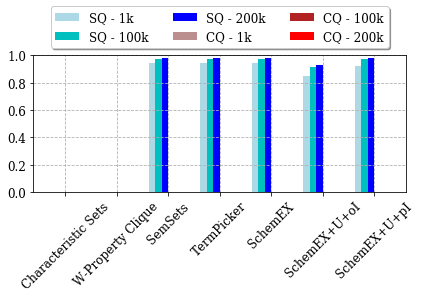

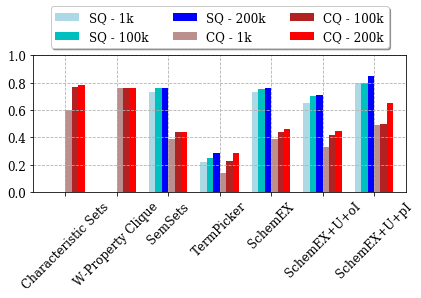

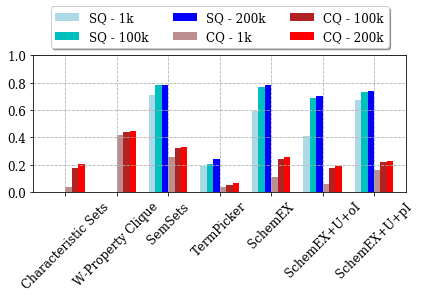

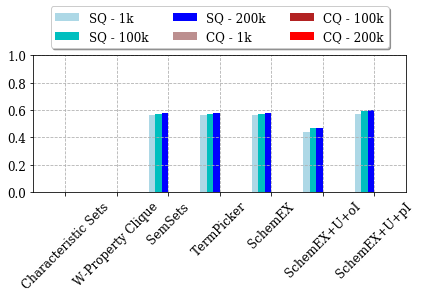

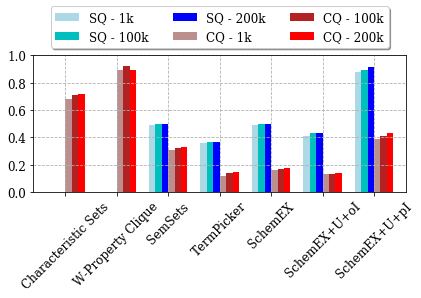

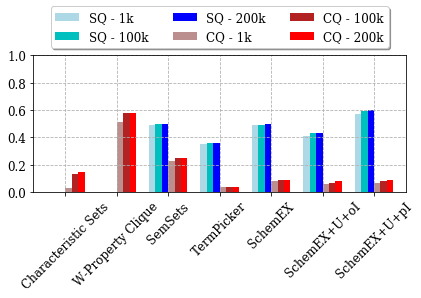

In [46]:
for dataset in datasets:
    for bisimK in bisimDepths:    
        # Load dataframe from CSV
        with open(os.path.join(data_dir, dataset +suffix + '.csv'), 'r') as f:
            df = pd.read_csv(f)
        df.head()
        # fig, ax = plt.subplots(figsize=(15,7))
        kf = df[df['k'] == bisimK]
        print(kf)
        kf['model'] = kf['model'].astype(model_dtype)
        kf['config'] = kf['config'].astype(config_dtype)
        ddf = kf.set_index(['model', 'config'])['f1']
        print(ddf)
        
        print('>>>>>>----------------')

        pdf = ddf.unstack()
        print(pdf)
        pdf = pdf.sort_values(by=['model'], axis=0, ascending=True)
        ax = pdf.plot(kind='bar', color=['lightblue', 'c', 'b', 'rosybrown', 'firebrick', 'red'], width=.75, rot=45)
        ax.set_ylim([0,1])
        # ax.legend(plot_methods.values())
        # ax.set_xticklabels([f'({int(i.left)}, {int(i.right)}]' for i in bins.cat.categories])
        ax.set_xlabel("")
        ax.set_ylabel("")
        ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.4), shadow=True, ncol=3)
        plt.tight_layout()
        plt.grid()
        plt.savefig(dataset + '-'+ str(bisimK) + 'approx.png')